# ZOMATO DATA ANALYSIS - 

## Import all the Libraries

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Read Dataset

In [5]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

## Dataset Cleaning

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Q1- Types of restaurent listed in dataset.

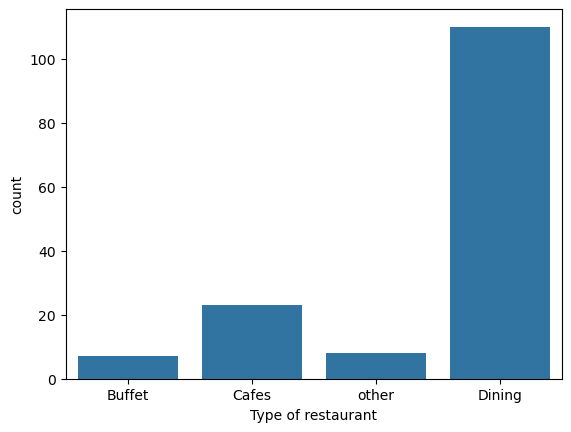

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.show()

### Which type of restaurents got most votes?

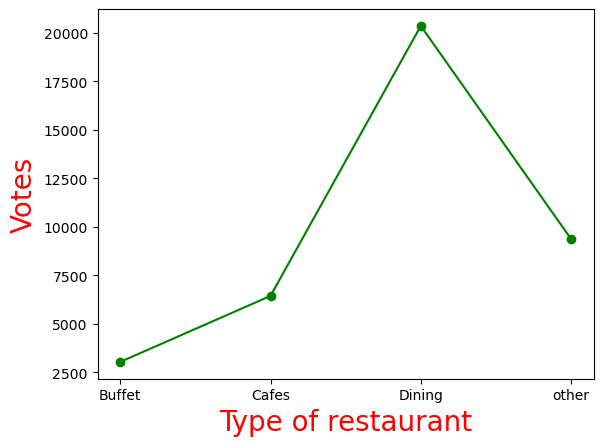

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)
plt.show()

## Which Restaurent Got Maximum votes?

In [13]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


## Restaurent accepts online orders.

In [15]:
dataframe.online_order.value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

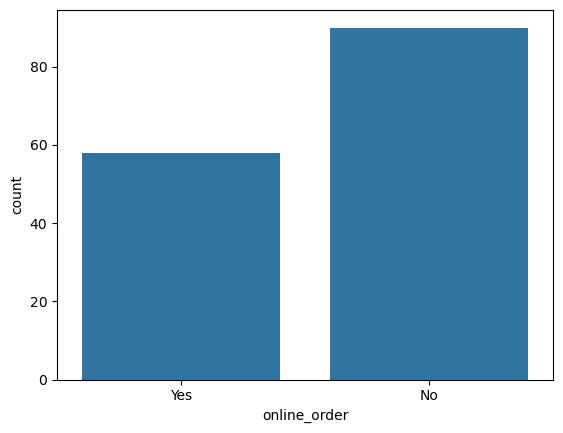

In [16]:
sns.countplot(x=dataframe['online_order'])
plt.show()

## Restaurent ratings distribution.

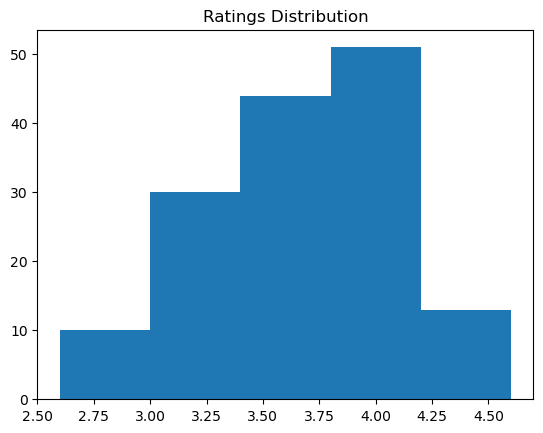

In [18]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()


## Restaurent approx cost for two person.

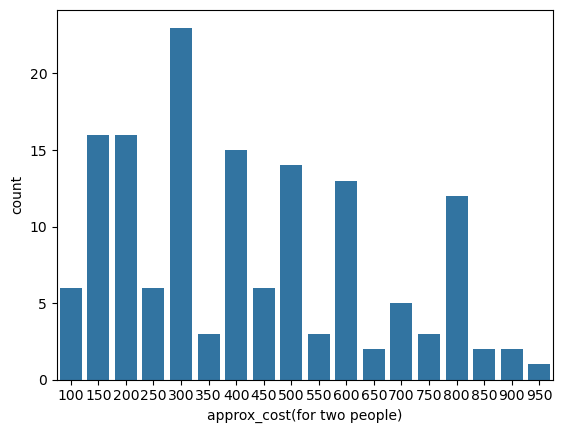

In [20]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

## Boxplot to show outliers in ratings.

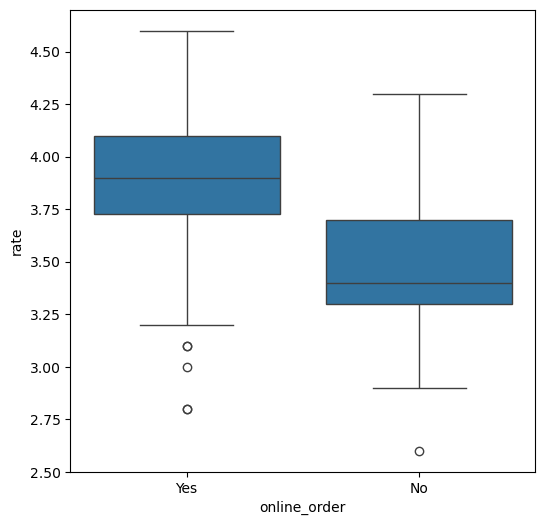

In [22]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
plt.show()

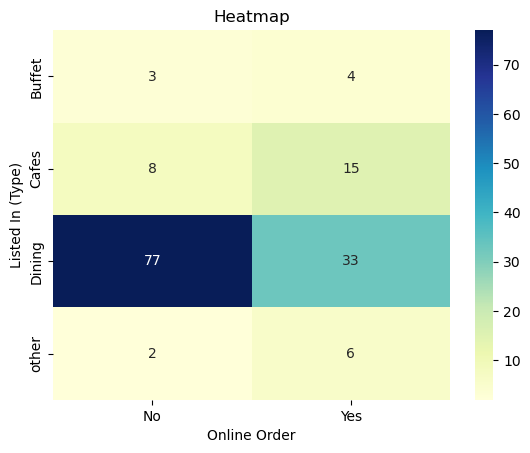

In [23]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


# Predictive Analysis

### Predict the number of Orders zomato will be receiving Tomorrow by analysing past data.

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Data
data = pd.read_csv("zomato_orders2.csv")
data['order_time'] = pd.to_datetime(data['order_time'])
data.set_index('order_time', inplace=True)

# Resample data hourly
data = data.resample('H').sum()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['total_orders']])

# Prepare data for LSTM
X, y = [], []
window_size = 6  # Using past 6 hours to predict the next hour
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y)

# Split Data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# Predict next 24 hours
last_window = X_test[-1].reshape(1, window_size, 1)
prediction = model.predict(last_window)
predicted_orders = scaler.inverse_transform(prediction)

print("Predicted hourly orders for the next day:", predicted_orders)


Epoch 1/50


/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_21290/369441390.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_time'] = pd.to_datetime(data['order_time'])
/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_21290/369441390.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').sum()
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2251
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1883
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1426
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1152
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0794
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0568
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0474
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0452
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0478
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0484
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0491
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0444
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0366
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0401
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0454
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/

### Showing the hourly received orders of zomato in past.

/var/folders/sb/hxcxtgd548zcncz9qb48ngw80000gn/T/ipykernel_21290/2602028666.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start="2025-05-11", periods=24*7, freq='H')


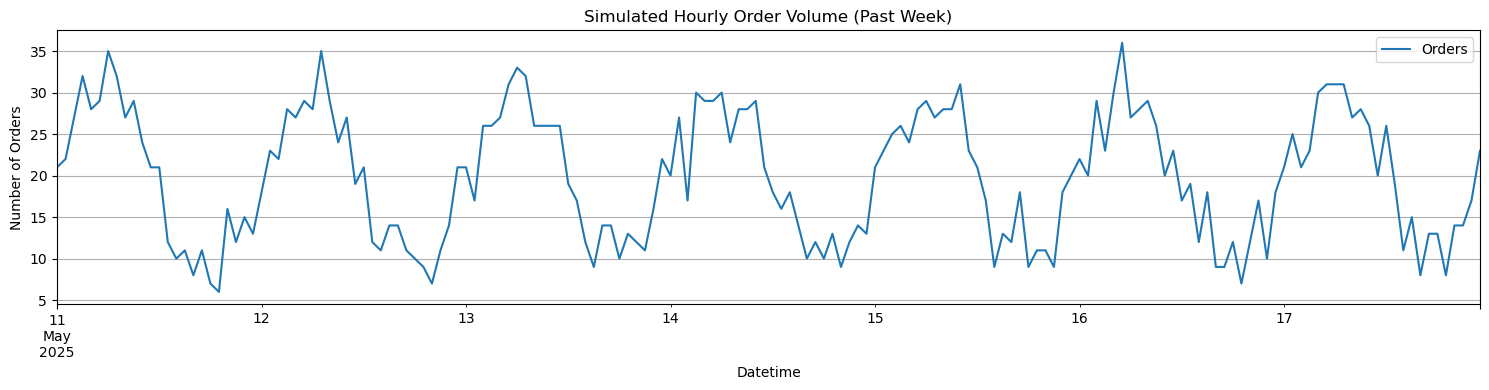

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Simulate datetime range for 7 days, hourly intervals
date_range = pd.date_range(start="2025-05-11", periods=24*7, freq='H')

# Simulate order volume using a sinusoidal pattern + noise
np.random.seed(42)
orders = (20 + 10 * np.sin(2 * np.pi * date_range.hour / 24) + np.random.normal(scale=3, size=len(date_range))).round().astype(int)

# Create simulated DataFrame
simulated_df = pd.DataFrame({'Datetime': date_range, 'Orders': orders})
simulated_df.set_index('Datetime', inplace=True)

# Plot the simulated data
simulated_df.plot(title='Simulated Hourly Order Volume (Past Week)', figsize=(15, 4))
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting the Orders of zomato for tomorrow on hourly basis.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


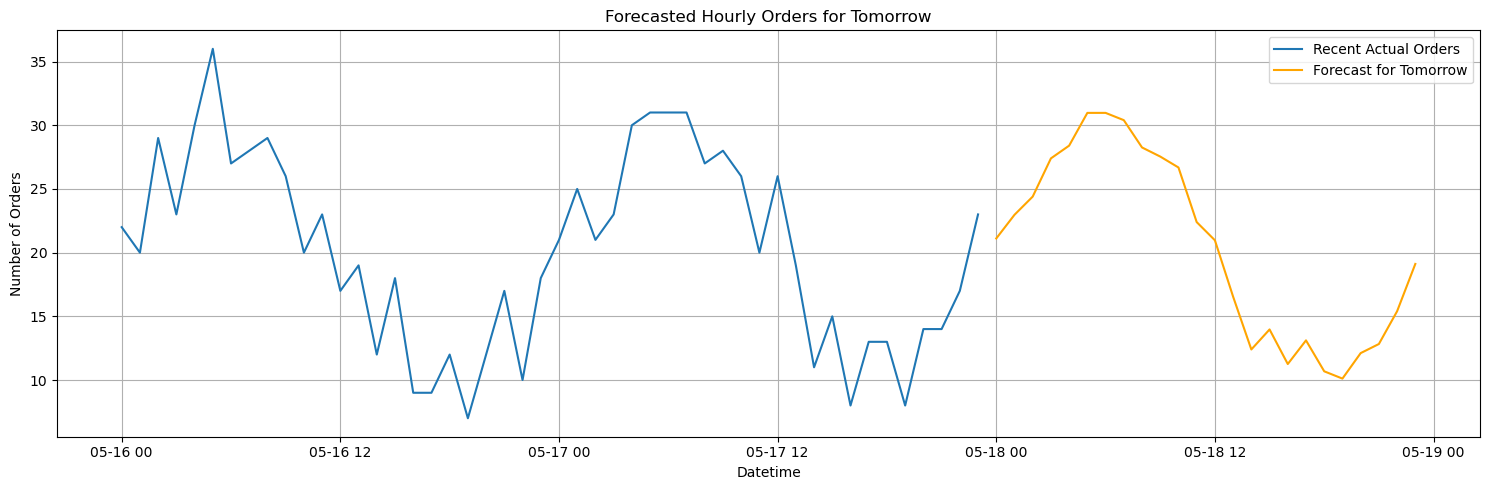

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit model
model = ExponentialSmoothing(simulated_df['Orders'], trend='add', seasonal='add', seasonal_periods=24)
fit = model.fit()

# Forecast next 24 hours
forecast = fit.forecast(24)

# Plot
plt.figure(figsize=(15, 5))
plt.plot(simulated_df.index[-48:], simulated_df['Orders'][-48:], label='Recent Actual Orders')
plt.plot(forecast.index, forecast, label='Forecast for Tomorrow', color='orange')
plt.title('Forecasted Hourly Orders for Tomorrow')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


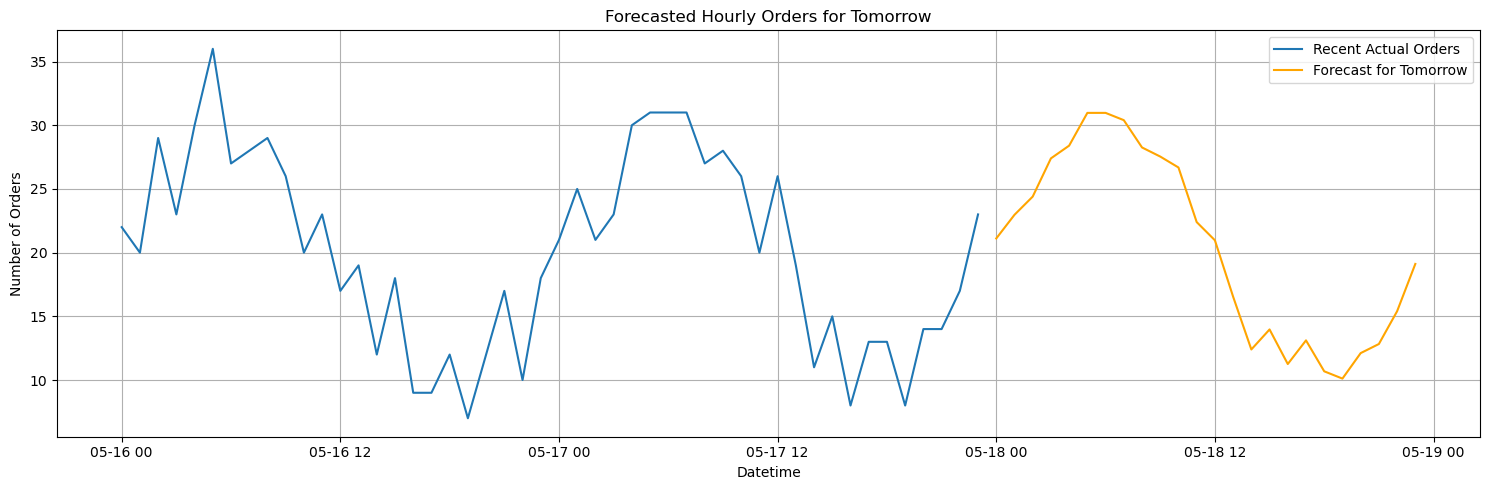

In [31]:
# Train Holt-Winters model
model = ExponentialSmoothing(simulated_df['Orders'], trend='add', seasonal='add', seasonal_periods=24)
fit = model.fit()

# Forecast next 24 hours (tomorrow)
forecast = fit.forecast(24)

# Plot forecast alongside recent actual data
plt.figure(figsize=(15, 5))
plt.plot(simulated_df.index[-48:], simulated_df['Orders'][-48:], label='Recent Actual Orders')
plt.plot(forecast.index, forecast, label='Forecast for Tomorrow', color='orange')
plt.title('Forecasted Hourly Orders for Tomorrow')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Predict the restaurent receive most orders for tomorrow.

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("Zomato-data-.csv")
print(df)

# Simulate a time column assuming each row is an order (randomly distributed over past 14 days)
np.random.seed(42)
random_dates = pd.date_range(end=pd.Timestamp.today(), periods=14).to_pydatetime().tolist()
df['order_datetime'] = pd.to_datetime(np.random.choice(random_dates, size=len(df))) + pd.to_timedelta(np.random.randint(0, 24*60, size=len(df)), unit='m')

# Extract date from simulated datetime
df['date'] = df['order_datetime'].dt.date

# Group by restaurant and date
daily_orders = df.groupby(['name', 'date']).size().reset_index(name='order_count')

# Pivot for time series format
pivot_df = daily_orders.pivot(index='date', columns='name', values='order_count').fillna(0)

# Compute 7-day rolling average
rolling_avg = pivot_df.rolling(window=7).mean()

# Predict top restaurant for "tomorrow" using last available day
forecast = rolling_avg.iloc[-1]
top_restaurant = forecast.idxmax()
top_orders = forecast.max()

top_restaurant, int(top_orders)



                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

("Aarush's Food Plaza", 0)

In [34]:
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("Zomato-data-.csv")

# Simulate datetime (random over last 14 days)
np.random.seed(42)
random_dates = pd.date_range(end=pd.Timestamp.today(), periods=14).to_pydatetime().tolist()
df['order_datetime'] = pd.to_datetime(np.random.choice(random_dates, size=len(df))) + pd.to_timedelta(np.random.randint(0, 24*60, size=len(df)), unit='m')

# Extract just the date for grouping
df['date'] = df['order_datetime'].dt.date


In [35]:
# Group by restaurant and date
daily_orders = df.groupby(['name', 'date']).size().reset_index(name='order_count')

# Pivot to time series format
pivot_df = daily_orders.pivot(index='date', columns='name', values='order_count').fillna(0)

# Rolling average over past 7 days
rolling_avg = pivot_df.rolling(window=7).mean()

# Get forecast for tomorrow based on last available trend
forecast = rolling_avg.iloc[-1]
top_restaurant = forecast.idxmax()
top_orders = forecast.max()

print(f"🏆 Predicted Top Restaurant for Tomorrow: {top_restaurant} with ~{int(top_orders)} orders")



🏆 Predicted Top Restaurant for Tomorrow: Aarush's Food Plaza with ~0 orders
